# Analysis of trends in permanent crops

## All freguesias

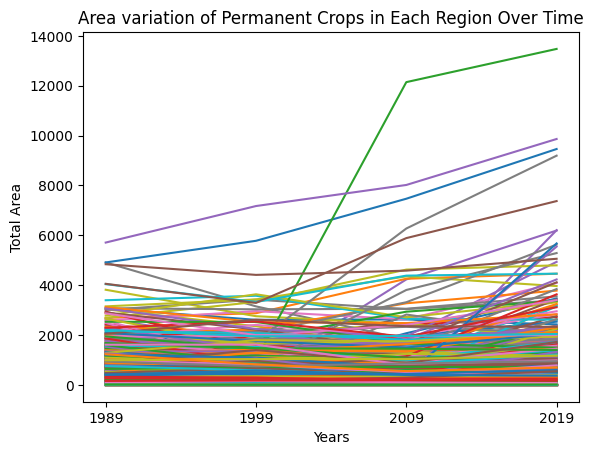

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
data = pd.read_csv('3_perm_crops.csv')

# Step 2: Calculate the sum of the area for each region
sum_area = data.groupby('region_name')[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum()

# Step 3: Create the line plot
years = ['1989', '1999', '2009', '2019']
regions = sum_area.index

for region in regions:
    plt.plot(years, sum_area.loc[region], label=region)

plt.xlabel('Years')
plt.ylabel('Total Area')
plt.title('Area variation of Permanent Crops in Each Region Over Time')
#plt.legend()
plt.show()

### Add trendlines to all freguesias

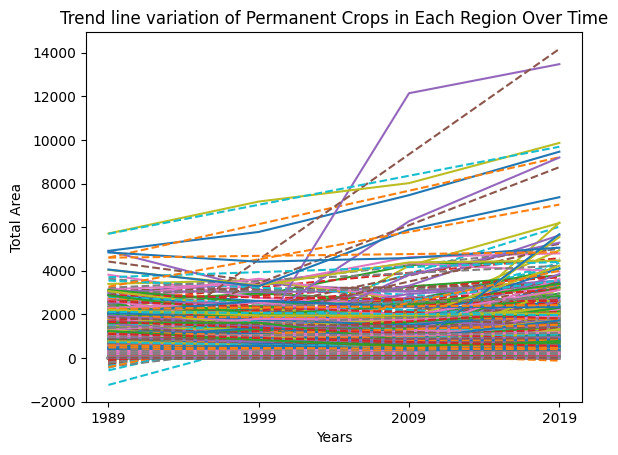

Regions with positive slope (> 1.5):
['Abambres', 'Abaças', 'Abela', 'Abraveses', 'Abreiro', 'Abrunhosa-a-Velha', 'Agilde', 'Agregação das freguesias Sul de Pinhel', 'Aguieiras', 'Airães', 'Aião', 'Alcafache', 'Alcaria Ruiva', 'Alcofra', 'Alcongosta', 'Alcântara', 'Aldeia Nova', 'Aldeia Velha', 'Aldeia das Dez', 'Aldeia do Bispo', 'Alfaiates', 'Alfaião', 'Alfarela de Jales', 'Algeriz', 'Almaceda', 'Almofala', 'Alte', 'Alto do Palurdo', 'Altura', 'Alvalade', 'Alvaredo', 'Alvarenga', 'Alverca da Beira/Bouça Cova', 'Alvite', 'Alvites', 'Alvito', 'Alvorge', 'Alvão', 'Amareleja', 'Ameixial', 'Amendoeira', 'Amêndoa', 'Angra (Nossa Senhora da Conceição)', 'Angra (São Pedro)', 'Arcas', 'Arcos', 'Arcozelo', 'Ardãos e Bobadela', 'Areias', 'Argozelo', 'Arnas', 'Arraiolos', 'Arrifana', 'Arrouquelas', 'Assunção, Ajuda, Salvador e Santo Ildefonso', 'Atei', 'Avelal', 'Aveleda', 'Avelãs da Ribeira', 'Avis', 'Avô', 'Avões', 'Azinhaga', 'Azinhal', 'Azinheira dos Barros e São Mamede do Sádão', 'Azinhoso'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from a CSV file
data = pd.read_csv('3_perm_crops.csv')

# Step 2: Calculate the sum of the area for each region
sum_area = data.groupby('region_name')[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum()

# Step 3: Create the line plot with trend lines and separate based on slope
years = ['1989', '1999', '2009', '2019']
regions = sum_area.index

positive_slope_regions = []
negative_slope_regions = []
in_between_regions = []

for region in regions:
    # Calculate the trend line using linear regression
    x = np.arange(len(years))
    y = sum_area.loc[region].values
    coeffs = np.polyfit(x, y, 1)
    trend_line = np.poly1d(coeffs)

    # Calculate the slope
    slope = coeffs[0]

    # Plot the original data
    plt.plot(years, y, label=region)

    # Plot the trend line
    plt.plot(years, trend_line(x), linestyle='dashed')

    # Separate based on slope
    if slope > 1.5:
        positive_slope_regions.append(region)
    elif slope < -1.5:
        negative_slope_regions.append(region)
    else:
        in_between_regions.append(region)

plt.xlabel('Years')
plt.ylabel('Total Area')
plt.title('Trend line variation of Permanent Crops in Each Region Over Time')
#plt.legend()
plt.show()

print("Regions with positive slope (> 1.5):")
print(positive_slope_regions)
print("\nRegions with negative slope (< -1.5):")
print(negative_slope_regions)
print("\nRegions in between the slopes:")
print(in_between_regions)


### Freguesias by slope class, positive, negative and flat

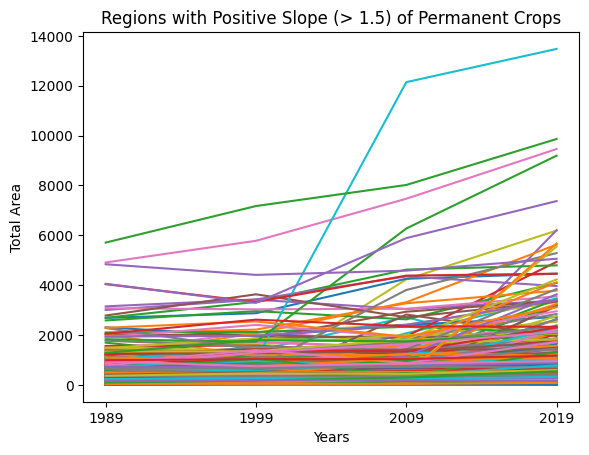

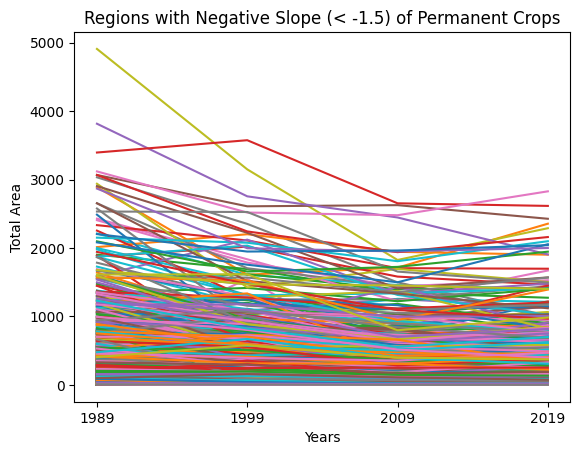

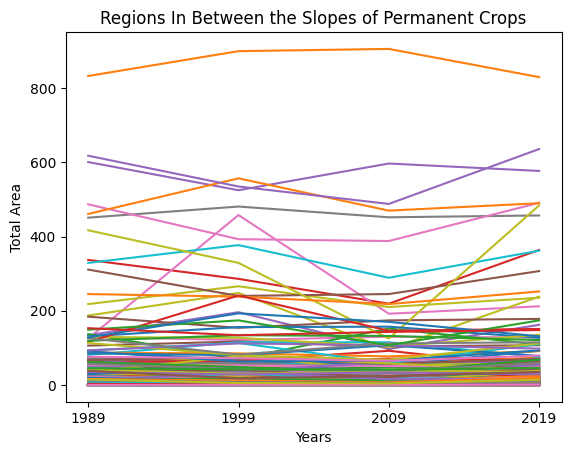

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from a CSV file
data = pd.read_csv('3_perm_crops.csv')

# Step 2: Calculate the sum of the area for each region
sum_area = data.groupby('region_name')[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum()

# Step 3: Create the line plots for each class
years = ['1989', '1999', '2009', '2019']
regions = sum_area.index

positive_slope_regions = []
negative_slope_regions = []
in_between_regions = []

for region in regions:
    # Calculate the trend line using linear regression
    x = np.arange(len(years))
    y = sum_area.loc[region].values
    coeffs = np.polyfit(x, y, 1)
    trend_line = np.poly1d(coeffs)

    # Calculate the slope
    slope = coeffs[0]

    if slope > 1.5:
        positive_slope_regions.append(region)
    elif slope < -1.5:
        negative_slope_regions.append(region)
    else:
        in_between_regions.append(region)

# Plot the regions with positive slope
plt.figure()
for region in positive_slope_regions:
    x = np.arange(len(years))
    y = sum_area.loc[region].values
    plt.plot(years, y, label=region)

plt.xlabel('Years')
plt.ylabel('Total Area')
plt.title('Regions with Positive Slope (> 1.5) of Permanent Crops')
#plt.legend()
plt.savefig('images/freg_slope_positive_perm.png')
plt.show()

# Plot the regions with negative slope
plt.figure()
for region in negative_slope_regions:
    x = np.arange(len(years))
    y = sum_area.loc[region].values
    plt.plot(years, y, label=region)

plt.xlabel('Years')
plt.ylabel('Total Area')
plt.title('Regions with Negative Slope (< -1.5) of Permanent Crops')
#plt.legend()
plt.savefig('images/freg_negative_neutral_perm.png')
plt.show()

# Plot the regions in between the slopes
plt.figure()
for region in in_between_regions:
    x = np.arange(len(years))
    y = sum_area.loc[region].values
    plt.plot(years, y, label=region)

plt.xlabel('Years')
plt.ylabel('Total Area')
plt.title('Regions In Between the Slopes of Permanent Crops')
#plt.legend()
plt.savefig('images/freg_slope_neutral_perm.png')
plt.show()


### Chart of the class of most positive and negative growth, by permanent crop type

C:\Users\alfor\AppData\Local\Temp\ipykernel_13644\1135050461.py:61: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


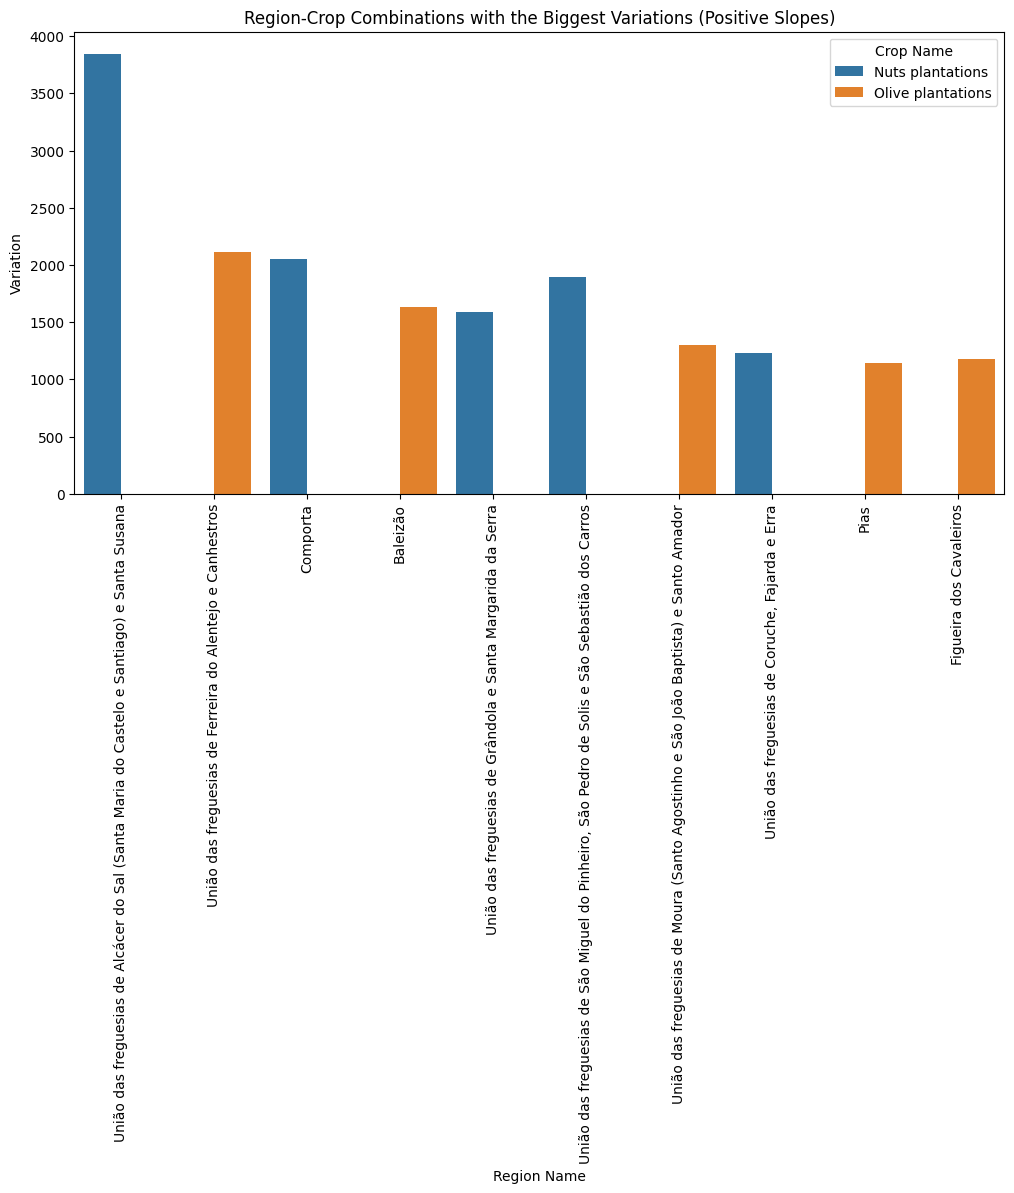

C:\Users\alfor\AppData\Local\Temp\ipykernel_13644\1135050461.py:75: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


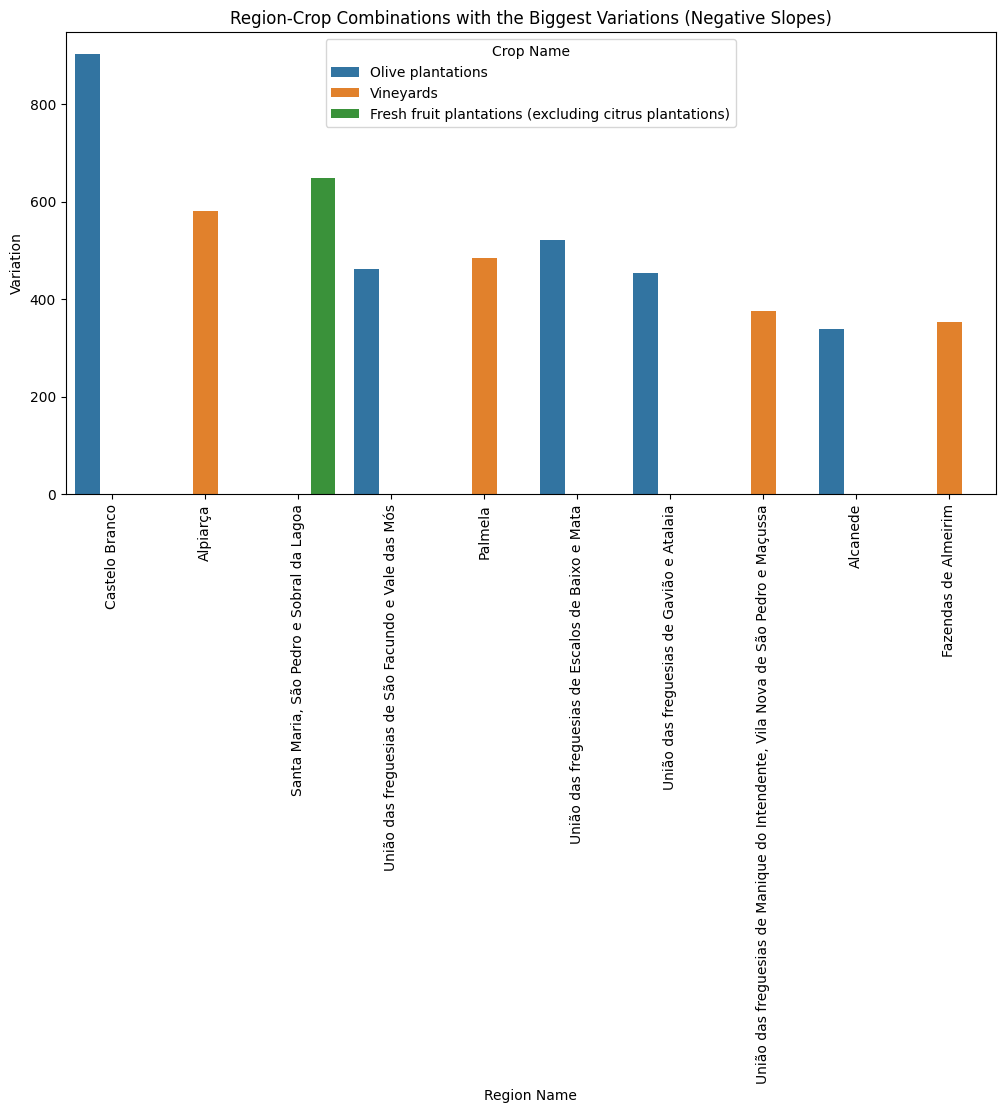

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data from a CSV file
data = pd.read_csv('3_perm_crops.csv')

# Step 2: Calculate the sum of the area for each region and crop
sum_area = data.groupby(['region_name', 'Perm_crop'])[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum()

# Calculate the slope and variation for each region and crop
region_crop_stats = []
for (region, crop), region_crop_data in sum_area.groupby(['region_name', 'Perm_crop']):
    years = ['1989', '1999', '2009', '2019']
    x = np.arange(len(years))
    y = region_crop_data.values.squeeze()
    coeffs = np.polyfit(x, y, 1)
    slope = coeffs[0]
    variation = np.abs(np.diff(y)).mean()
    region_crop_stats.append((region, crop, slope, variation))

# Separate region-crop combinations into positive slopes and negative slopes
positive_slopes = [(region, crop, slope, variation) for region, crop, slope, variation in region_crop_stats if slope > 0]
negative_slopes = [(region, crop, slope, variation) for region, crop, slope, variation in region_crop_stats if slope < 0]

# Sort the positive and negative slopes based on slope value in descending order
sorted_positive_slopes = sorted(positive_slopes, key=lambda x: x[2], reverse=True)
sorted_negative_slopes = sorted(negative_slopes, key=lambda x: abs(x[2]), reverse=True)


# Create a table using pandas.DataFrame.style for positive slopes
positive_slopes_df = pd.DataFrame(sorted_positive_slopes, columns=['Region Name', 'Crop Name', 'Slope', 'Variation'])
top_10_positive_slopes = positive_slopes_df.head(10)
positive_styled_table = top_10_positive_slopes.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
).set_caption('Top 10 Region-Crop Combinations with Biggest Positive Slopes')

# Convert styled table to DataFrame for positive slopes
positive_table_df = positive_styled_table.data

# Create a table using pandas.DataFrame.style for negative slopes
negative_slopes_df = pd.DataFrame(sorted_negative_slopes, columns=['Region Name', 'Crop Name', 'Slope', 'Variation'])
top_10_negative_slopes = negative_slopes_df.head(10)
negative_styled_table = top_10_negative_slopes.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
).set_caption('Top 10 Region-Crop Combinations with Biggest Negative Slopes')

# Convert styled table to DataFrame for negative slopes
negative_table_df = negative_styled_table.data


# Create a graph showing region-crop combinations and their variations for positive slopes
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_positive_slopes, x='Region Name', y='Variation', hue='Crop Name')
plt.xlabel('Region Name')
plt.ylabel('Variation')
plt.title('Region-Crop Combinations with the Biggest Variations (Positive Slopes)')
plt.xticks(rotation=90)
plt.legend(title='Crop Name')
plt.tight_layout()

# Save the last image to the "images" folder
plt.savefig('images/biggest_win_slope_perm.png')
plt.show()

# Create a graph showing region-crop combinations and their variations for negative slopes
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_negative_slopes, x='Region Name', y='Variation', hue='Crop Name')
plt.xlabel('Region Name')
plt.ylabel('Variation')
plt.title('Region-Crop Combinations with the Biggest Variations (Negative Slopes)')
plt.xticks(rotation=90)
plt.legend(title='Crop Name')
plt.tight_layout()

# Save the last image to the "images" folder
plt.savefig('images/biggest_loss_slope_perm.png')
plt.show()

### Table of most positive and negative slope freguesias of perm crops

In [15]:
from prettytable import PrettyTable

# Create a table using PrettyTable for positive slopes
positive_table = PrettyTable()
positive_table.field_names = ['Region Name', 'Crop Name', 'Slope', 'Variation(ha)']
positive_table.align = 'l'  # Align columns to the left
for region_crop in sorted_positive_slopes[:10]:
    positive_table.add_row([region_crop[0], region_crop[1], f"{region_crop[2]:.2f}", f"{region_crop[3]:.2f}"])

print('Top 10 Region-Crop Combinations with Biggest Positive Slopes:')
print(positive_table)
print()

# Create a table using PrettyTable for negative slopes
negative_table = PrettyTable()
negative_table.field_names = ['Region Name', 'Crop Name', 'Slope', 'Variation(ha)']
negative_table.align = 'l'  # Align columns to the left
for region_crop in sorted_negative_slopes[:10]:
    negative_table.add_row([region_crop[0], region_crop[1], f"{region_crop[2]:.2f}", f"{region_crop[3]:.2f}"])

print('Top 10 Region-Crop Combinations with Biggest Negative Slopes:')
print(negative_table)
print()



Top 10 Region-Crop Combinations with Biggest Positive Slopes:
+-----------------------------------------------------------------------------------------------+-------------------+---------+---------------+
| Region Name                                                                                   | Crop Name         | Slope   | Variation(ha) |
+-----------------------------------------------------------------------------------------------+-------------------+---------+---------------+
| União das freguesias de Alcácer do Sal (Santa Maria do Castelo e Santiago) e Santa Susana     | Nuts plantations  | 4531.80 | 3846.33       |
| União das freguesias de Ferreira do Alentejo e Canhestros                                     | Olive plantations | 2203.20 | 2116.00       |
| Comporta                                                                                      | Nuts plantations  | 1844.80 | 2049.67       |
| Baleizão                                                                

### Number and percentage of each class of slope of permanent crops

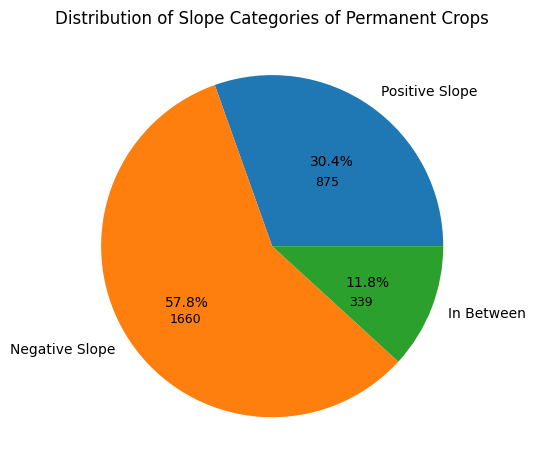

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
data = pd.read_csv('3_perm_crops.csv')

# Step 2: Calculate the sum of the area for each region
sum_area = data.groupby('region_name')[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum()

# Step 3: Categorize the regions based on slope
years = ['1989', '1999', '2009', '2019']
regions = sum_area.index

positive_slope_regions = []
negative_slope_regions = []
in_between_regions = []

for region in regions:
    # Calculate the trend line using linear regression
    x = range(len(years))
    y = sum_area.loc[region].values
    coeffs = np.polyfit(x, y, 1)
    slope = coeffs[0]

    if slope > 1.5:
        positive_slope_regions.append(region)
    elif slope < -1.5:
        negative_slope_regions.append(region)
    else:
        in_between_regions.append(region)

# Count the number of regions in each category
positive_count = len(positive_slope_regions)
negative_count = len(negative_slope_regions)
in_between_count = len(in_between_regions)

# Create a pie chart
categories = ['Positive Slope', 'Negative Slope', 'In Between']
counts = [positive_count, negative_count, in_between_count]

plt.pie(counts, labels=categories, autopct='%1.1f%%')

# Add count numbers below the percentages
plt.gca().set_aspect('equal')  # Ensure pie is drawn as a circle
plt.text(0.25, 0.35, f'{positive_count}', fontsize=9)
plt.text(-0.6, -0.45, f'{negative_count}', fontsize=9)
plt.text(0.45, -0.35, f'{in_between_count}', fontsize=9)

plt.title('Distribution of Slope Categories of Permanent Crops')
plt.tight_layout()

# Save the last image to the "images" folder
plt.savefig('images/slope_categories_percentage_perm.png')

plt.show()